In [9]:
# using python 3.11 for this 

import photutils
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from photutils.psf import fit_fwhm
fn = '/Users/thomasmcintosh/Desktop/CHARIS-REU/testing_model/BD343631/cubes/CRSA00123422_flat.fits'

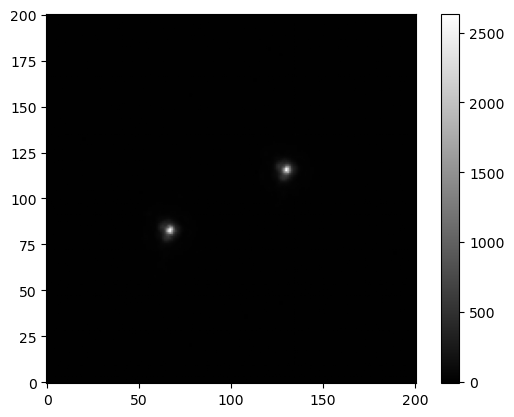

[4.98547157]


In [28]:
test_hdul = fits.open(fn)
image_data = (test_hdul[1].data)#[:,:,:99]
image_data_right = (test_hdul[1].data)[:,:,100:200]
#aperture.plot(color='red')
plt.imshow(image_data[12], origin='lower', cmap='gray')
plt.colorbar()
plt.show()
guess = [140,125] # Star is unpol, so should be roughly the same on both sides
fwhm = fit_fwhm(image_data[12],xypos=guess,fit_shape=53)
print(fwhm)
